<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Решение пункта 1:`

$Q(w) = (y-xw)^T(y-xw)+\lambda w^2$

$\nabla_w Q(w)$ = ?

$dQ(w) = \nabla_w^TQdw$

$dQ = d(y-xw)^T(y-xw)+\lambda w^2$ = 

$d((y-xw)^T(y-xw))+d(\lambda w^2)$ = 

$d(y-xw)^T(y-xw) + (y-xw)^Td(y-xw) + \lambda d(w^2)$ = 

$d(-w^Tx^T)(y-xw) + (y-xw)^Td(-xw) + \lambda d(w^2)$ 


$w^Tx^T$ [1xn] & $y-xw$ [nx1] -> $w^Tx^T(y-xw)$ [1X1]  -> можем транспонировать

$(y-xw)^Td(-xw) + (y-xw)^Td(-xw)+ 2\lambda w dw$ =

$(y-xw)^T(-x)dw + (y-xw)^T(-x)dw + 2\lambda w wd$ = 

$((y-xw)^T(-x) + (y-xw)^T(-x) + 2\lambda w) dw$ = 

$(-2(y-xw)^Tx + 2\lambda w) dw$


$\nabla_w Q(w)$ = $(-2(y-xw)^Tx + 2\lambda w)^T$ = $-2x^T(y-xw) + 2 \lambda w$

Выведем формулу для оптимального $w$

$-2x^T(y-xw) + 2 \lambda w$ = 0

$-2x^Ty+2x^Txw + 2 \lambda w$ = 0

$2 \lambda w + 2x^Txw = 2x^Ty$

$(\lambda I+ x^Tx)w = x^Ty$

$w = (\lambda I + x^Tx)^{-1}x^Ty$


`Решение пункта 2:`

$\nabla^2_w Q(w)$ = $d(-2x^T(y-xw) + 2 \lambda w)$ = 

$-2x^Td(y-xw) + 2 \lambda dw$ = 

$-2x^T(-x)dw + 2 \lambda dw$ = 

$2dw + 2\lambda dw$ = $(2 + 2\lambda)dw$

Критерий Сильвестра:

$v^THv$ = $v^T(2+2\lambda)v$ = $2 + 2\lambda$ 

Так как из условия следует, что $\lambda$ - положительный параметр, то критерий сильвестра всегда будет положительный -> мы находимся в точке минимума

`Решение пункта 3`:

$x_{n+1} = x_n - \alpha \nabla Q(x_{n})$

$\alpha = \frac{\|x_n - x_{n+1}\|}{\|\nabla Q(x_n)\|}$

## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [180]:
from math import sin, cos

# Функция и её производная
def f(x):
  return x * sin(5 * x) + 0.1 * (x**2)


def df(x):
    return sin(5 * x) + 5 * x * cos(5*x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f, df, x0, eta=0.001, max_iter=1000, tol=1e-6):
    x_curr = x0
    path = [x_curr]
    path[0] = x_curr
    for i in range(1, max_iter):
        x_new = x_curr - eta * df(x_curr)
        path.append(x_new)
        if abs(x_new - x_curr) < tol:
            return x_curr, path
        x_curr = x_new
    return x_curr, path


# Поиск экстремумов
def find_points(f, df, x0, eta=0.001, max_iter=1000, tol=1e-6):
    x_curr = x0
    min_path = [x_curr]
    for i in range(1, max_iter):
        x_new = x_curr - eta * df(x_curr)
        if abs(x_new - x_curr) < tol:
            minimum = x_curr
            break
        x_curr = x_new
        min_path.append(x_curr)

    x_curr = x0
    max_path = [x_curr]
    for i in range(1, max_iter):
        x_new = x_curr + eta * df(x_curr)
        if abs(x_new - x_curr) < tol:
            maximum = x_curr
            break
        x_curr = x_new
        max_path.append(x_curr)
    return minimum, min_path, maximum, max_path


======================================== ДЛЯ ТОЧКИ X = 0 ========================================


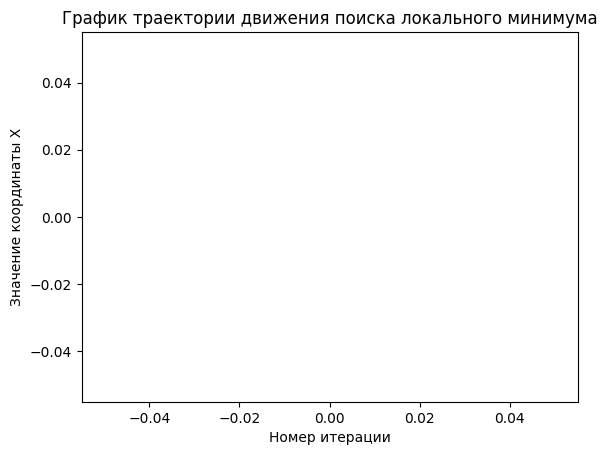

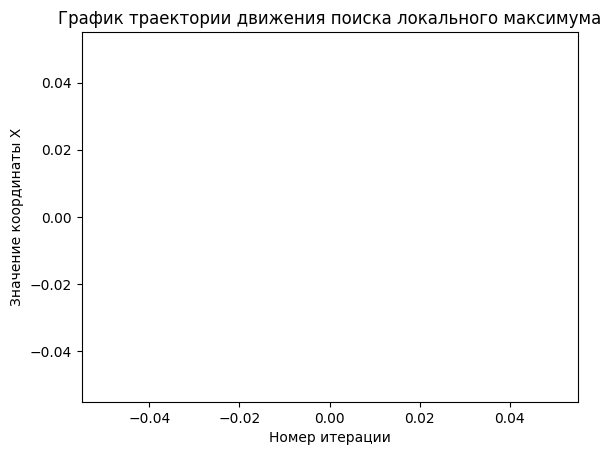

======================================== ДЛЯ ТОЧКИ X = 0.5 ========================================


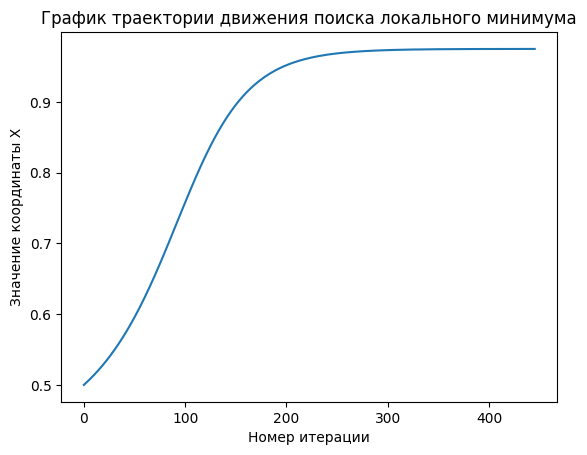

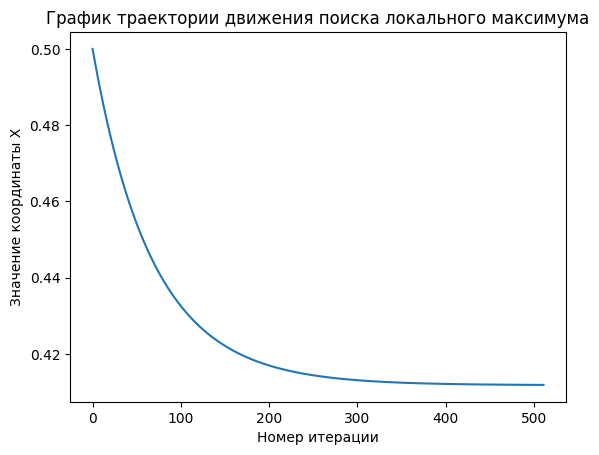

======================================== ДЛЯ ТОЧКИ X = 1 ========================================


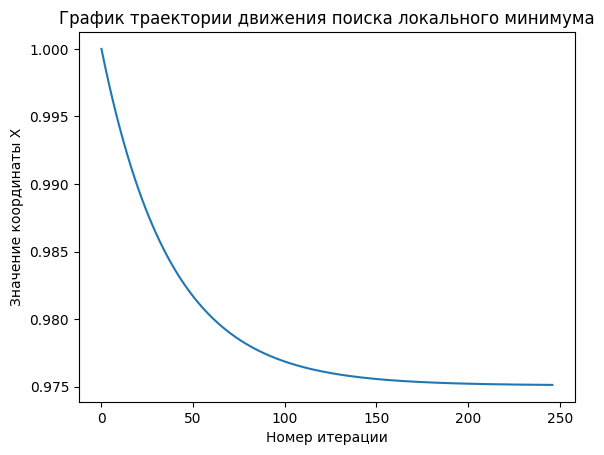

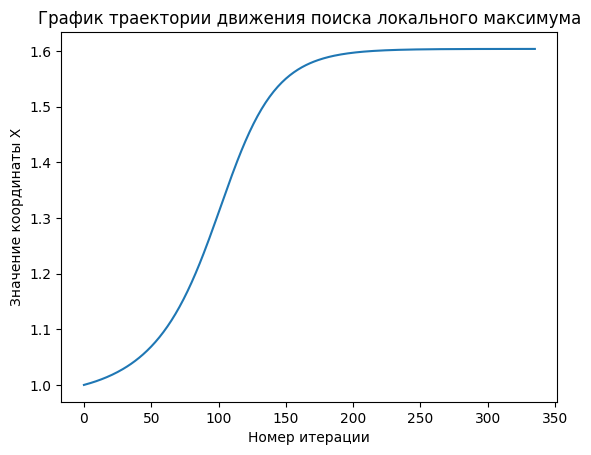

In [177]:
x0_arr = [0, 0.5, 1]
for x0 in x0_arr:
    print('='*40 + f' ДЛЯ ТОЧКИ X = {x0} ' + '='*40)
    minimum, min_path, maximum, max_path = find_points(f=f, df=df, x0=x0)
    plt.plot(min_path)
    plt.title('График траектории движения поиска локального минимума')
    plt.xlabel('Номер итерации')
    plt.ylabel('Значение координаты X')
    plt.show()
    plt.plot(max_path)
    plt.title('График траектории движения поиска локального максимума')
    plt.xlabel('Номер итерации')
    plt.ylabel('Значение координаты X')
    plt.show()

`Значение экстремумов равны: 0.975 (точка локального минимума), 0.41 (точка локального максимума), 1.6 (точка локального максимума)`

`При старте из точки X0 = 0 локальные экстремумы не найдены. Возможная причина этому: начальная точка выбрана в области, где нет близлежащих экстремумов, или данная точка и является локальным экстремумом.`

`Точки локального минимума совпадают при начальных точках 0.5 и 1`

======================================== ДЛЯ ТОЧКИ X = 0 ========================================


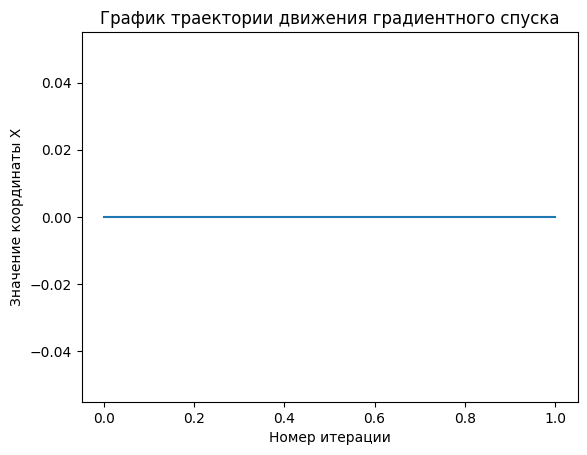

======================================== ДЛЯ ТОЧКИ X = 0.5 ========================================


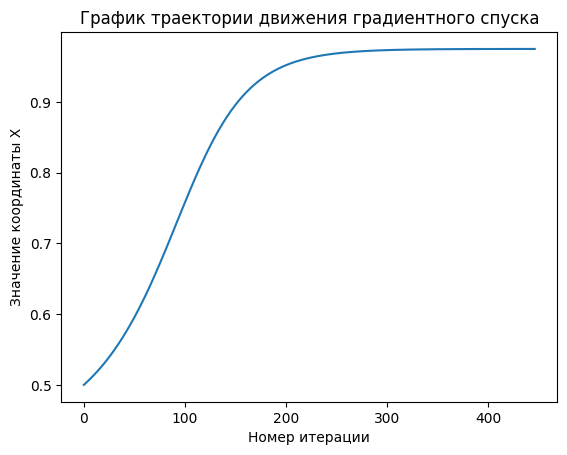

======================================== ДЛЯ ТОЧКИ X = 1 ========================================


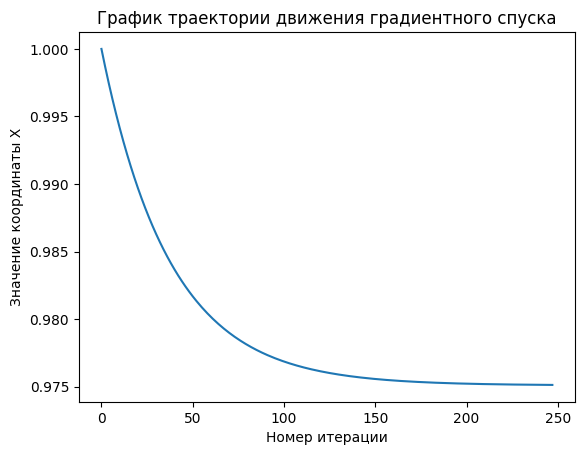

In [182]:
for x0 in x0_arr:
    print('='*40 + f' ДЛЯ ТОЧКИ X = {x0} ' + '='*40)
    x_min, path = gradient_descent(f=f, df=df, x0=x0)
    plt.plot(path)
    plt.title('График траектории движения градиентного спуска')
    plt.xlabel('Номер итерации')
    plt.ylabel('Значение координаты X')
    plt.show()

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

$w = (x^Tx)^{-1}x^Ty$

In [101]:
import numpy as np
def ols_solution(X, y):
    X, y = np.array(X), np.array(y)
    return np.linalg.inv(X.T @ X) @ X.T @ y

def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

In [2]:
X = [[-1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [400, 1500, 2400]

ols_solution(X, y)

array([100., 100., 100.])

In [3]:
# проверим, что ручная реализация считает правильно веса
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([100., 100., 100.])

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [ ]:
import random

def compute_cost(X, y, params):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ params - y) ** 2)
    return cost


def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    j = 0

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0, len(X)-1)

        # обновите веса, используя сдвиг по градиенту только по объекту X[j]
        params = params - 2. * learning_rate * (X[j] * ((X[j] @ params) - y[j]))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [183]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import time

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [184]:
def gradient_descent(X, y, learning_rate=0.01, iterations=10_000):
    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations,1))
    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)
    return cost_track, params

In [185]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10_000):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    j = 0
    cost_track = np.zeros((iterations,1))
    for i in range(iterations):
        j = random.randint(0, len(X)-1)
        params = params - 2. * learning_rate * (X[j] * ((X[j] @ params) - y[j]))
        cost_track[i] = compute_cost(X, y, params)
    return cost_track, params

In [186]:
# analytical solution
t1 = time.time()
weights = ols_solution(X, y)
t2 = time.time()
pred = X @ weights
print(f'R2 = {r2_score(y, pred)}')
print(f'Код выполнен за {t2 - t1} секунд')

R2 = 0.7554626185750483
Код выполнен за 0.015826940536499023 секунд


R2 = 0.7554626185750483
Код выполнен за 9.73955512046814 секунд


Text(0, 0.5, 'loss')

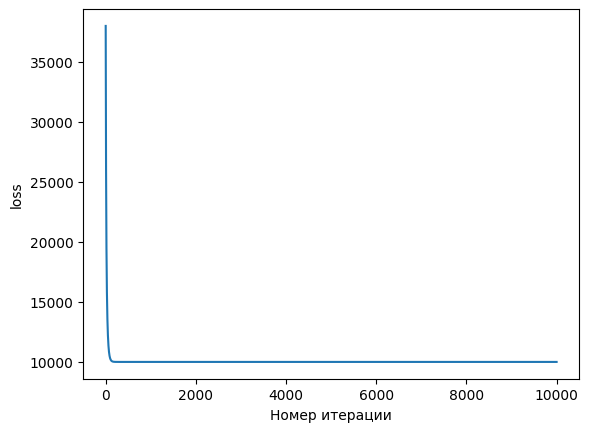

In [187]:
# GD
t1 = time.time()
loss, weights = gradient_descent(X, y)
t2 = time.time()
pred = prediction(X, weights)
print(f'R2 = {r2_score(y, pred)}')
print(f'Код выполнен за {t2 - t1} секунд')
plt.plot(loss)
plt.xlabel('Номер итерации')
plt.ylabel('loss')

R2 = 0.7134893577945831
Код выполнен за 3.561068058013916 секунд


Text(0, 0.5, 'loss')

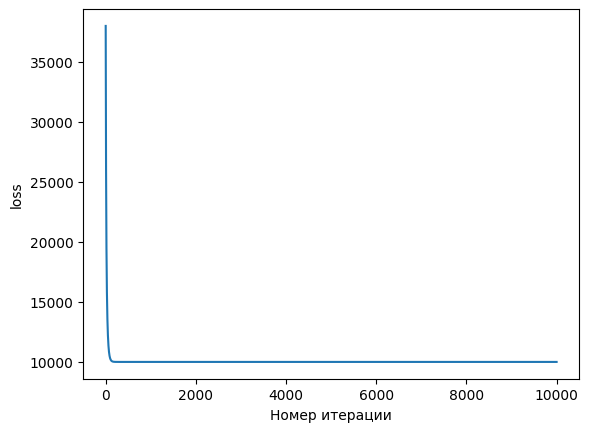

In [188]:
# SGD
t1 = time.time()
_, weights = stochastic_gradient_descent(X, y)
t2 = time.time()
pred = prediction(X, weights)
print(f'R2 = {r2_score(y, pred)}')
print(f'Код выполнен за {t2 - t1} секунд')
plt.plot(loss)
plt.xlabel('Номер итерации')
plt.ylabel('loss')

```
1. Модель точного решения и GD нашли локальный минимум, модель же SGD нашла точку, близкую к точке минимума. Это произошло из-за рандомизации случайного объекта, на котором считался антиградиент.

2. Решение по точной формуле показало наивысшую вычислительную скорость (менее 1 секунды), в то время как на SGD потребовалось 3 секунда, а на GD - почти 10 секунд.

3. Графики нарисованы выше.

4. Наибольший R2 у меня решения по точной формуле и у GD (у данных моделей R2 одинаковый).
```

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [121]:
def compute_cost_l2(X, y, params, lamb):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ params - y) ** 2) + lamb * (np.linalg.norm(params) ** 2)
    return cost


def stochastic_gradient_descent_l2(X, y, lamb, learning_rate=0.01, iterations=10_000):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    j = 0
    cost_track = np.zeros((iterations,1))
    for i in range(iterations):
        j = random.randint(0, len(X)-1)
        params = params - learning_rate * (2. * (X[j] * ((X[j] @ params) - y[j])) + 2 * lamb * params)
        cost_track[i] = compute_cost_l2(X, y, params, lamb)

    return cost_track, params

In [126]:
results = {}
from tqdm import tqdm
for lamb in tqdm(np.arange(0.1, 1.1, 0.1)):
    _, params = stochastic_gradient_descent_l2(X, y, lamb)
    pred = prediction(X, params)
    results[round(lamb, 1)] = r2_score(y, pred)

100%|██████████| 10/10 [00:32<00:00,  3.22s/it]


In [138]:
# Зависимость R2 от коэффициента регуляризации
pd.DataFrame(results.values(), index=results.keys(), columns=['r2']).sort_values(by='r2', ascending=False)

,r2
0.1,0.732608
0.2,0.730818
0.4,0.690463
0.3,0.683209
0.6,0.671542
0.5,0.657934
0.7,0.651128
0.8,0.646277
0.9,0.628625
1.0,0.622201


`Наибольшая точность предсказания получилось при коэффициент регуляризации равным 0.1 (а с увеличением его предиктивная способность модели только ухудшается).`

```
Это может быть обусловлено природой данных, на которых обучалась модель: содержит мало шума, признаки не коррелируют между собой, поэтому переобучение не возникает, и модель без регуляризации (или с минимальной) показывает наилучший результат.
```

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

`Реализую Momentum`

$x_{k+1} = x_k - \alpha_k\nabla f(x_k) + \beta_k (x_k - x_{k-1})$

In [ ]:
def modified_grad_descent(X, y, learning_rate=0.01, beta=0.9, iterations=10_000):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations,1))
    # перед первой итерацией мы не знаем значение предыдущих весов, поэтому решил брать их равными инициализации
    # в данном случае в момент первой итерации значение при beta зануляется -> считается стандартный градиентный спуск
    # со второй итерации считается Momentum
    prev_params = params 
    for i in range(iterations):
        prev_params, params = params, params - 2./m * learning_rate * (X.T @ ((X @ params) - y)) + beta * (params - prev_params)
        cost_track[i] = compute_cost(X, y, params)
    return cost_track, params

In [160]:
_, params = modified_grad_descent(X, y)
pred =prediction(X, params)
r2_score(y, pred)

0.7554626185750483

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

```
Существуют как проблемы метода Ньютона:

- Если начальное приближение недостаточно близко к решению, то метод может не сойтись.
- Если производная не непрерывна в точке корня, то метод может расходиться в любой окрестности корня.
- Если не существует вторая производная в точке корня, то скорость сходимости метода может быть заметно снижена.
- Если производная в точке корня равна нулю, то скорость сходимости не будет квадратичной, а сам метод может преждевременно прекратить поиск, и дать неверное для заданной точности приближение.

Так и прочие проблемы методов второго порядка: вычислительная сложность (вычисление второй производной требует большего времени) и хранение в памяти дополнительно матрицы вторых производных (что для многомиллионных параметров в модели становится крайне проблематично).

Поэтому чаще выбирают методы первого порядка, которые более сбалансированы между скоростью вычислений и точностью.
```

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

`Мое предположение: alonagolubovich (Алена Голубович)`